In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the Dataset

In [2]:
def load_data():
    data_set  = pd.read_csv('data/flight_delays_data.csv')

    return data_set

def preprocess_data(data_set):
    # alter first column values from c-1 to 1, c-2 to 2, c-3 to 3
    data_set['Month'] = data_set['Month'].apply(lambda x: int(x.split('-')[1]))
    data_set['DayofMonth'] = data_set['DayofMonth'].apply(lambda x: int(x.split('-')[1]))
    data_set['DayOfWeek'] = data_set['DayOfWeek'].apply(lambda x: int(x.split('-')[1]))

    # convert categorical data to numerical data
    carrier_map = data_set['UniqueCarrier'].unique()
    origin_map = data_set['Origin'].unique()
    dest_map = data_set['Dest'].unique()
    label_map = data_set['dep_delayed_15min'].unique()
    data_set['UniqueCarrier'] = data_set['UniqueCarrier'].apply(lambda x: list(carrier_map).index(x))
    data_set['Origin'] = data_set['Origin'].apply(lambda x: list(origin_map).index(x))
    data_set['Dest'] = data_set['Dest'].apply(lambda x: list(dest_map).index(x))
    data_set['dep_delayed_15min'] = data_set['dep_delayed_15min'].apply(lambda x: list(label_map).index(x))

    return data_set, carrier_map, origin_map, dest_map, label_map

data_set  = load_data()
data_set, carrier_list, origin_list, dest_list, label_list = preprocess_data(data_set)
data_set.head()

Month  DayofMonth  DayOfWeek  DepTime  UniqueCarrier  Origin  Dest  \
0      8          21          7     1934              0       0     0   
1      4          20          3     1548              1       1     1   
2      9           2          5     1422              2       2     2   
3     11          25          6     1015              3       3     3   
4     10           7          6     1828              4       4     4   

   Distance  dep_delayed_15min  
0       732                  0  
1       834                  0  
2       416                  0  
3       872                  0  
4       423                  1

# EDA (Exploratory Data Analysis)

## General Info

In [9]:
print(data_set.describe())
print(data_set.info())

# number of flights delayed and not delayed
print("\nNumber of flights delayed (1) and not delayed (0):")
flight_delay_counts = data_set['dep_delayed_15min'].value_counts()
print(flight_delay_counts)
print("Percentage of flights delayed: ", (flight_delay_counts[1]/(flight_delay_counts[0] + flight_delay_counts[1]))*100)

               Month     DayofMonth     DayOfWeek        DepTime  \
count  100000.000000  100000.000000  100000.00000  100000.000000   
mean        6.537640      15.703850       3.95183    1341.523880   
std         3.413447       8.793931       1.99164     476.378445   
min         1.000000       1.000000       1.00000       1.000000   
25%         4.000000       8.000000       2.00000     931.000000   
50%         7.000000      16.000000       4.00000    1330.000000   
75%         9.000000      23.000000       6.00000    1733.000000   
max        12.000000      31.000000       7.00000    2534.000000   

       UniqueCarrier        Origin           Dest      Distance  \
count  100000.000000  100000.00000  100000.000000  100000.00000   
mean        6.679210      50.23177      49.068550     729.39716   
std         5.239714      49.56570      49.594912     574.61686   
min         0.000000       0.00000       0.000000      30.00000   
25%         3.000000      12.00000      13.000000   

According to the percentage of the target classes, no-learning would result in %80 accuracy with the majority class prediction method. So we need to achieve higher than 80.

## Correlation Matrix

                      Month  DayofMonth  DayOfWeek   DepTime  UniqueCarrier  \
Month              1.000000    0.007106   0.004717 -0.001544       0.014299   
DayofMonth         0.007106    1.000000  -0.015537  0.001116      -0.005083   
DayOfWeek          0.004717   -0.015537   1.000000  0.009392       0.010348   
DepTime           -0.001544    0.001116   0.009392  1.000000       0.008854   
UniqueCarrier      0.014299   -0.005083   0.010348  0.008854       1.000000   
Origin            -0.005031   -0.004077   0.003417 -0.093232      -0.001858   
Dest              -0.006973    0.004281   0.000646  0.111173       0.028323   
Distance           0.006853    0.001510   0.011937 -0.020681       0.013147   
dep_delayed_15min  0.016998    0.025842   0.010439  0.243819       0.015146   

                     Origin      Dest  Distance  dep_delayed_15min  
Month             -0.005031 -0.006973  0.006853           0.016998  
DayofMonth        -0.004077  0.004281  0.001510           0.025842  
Da

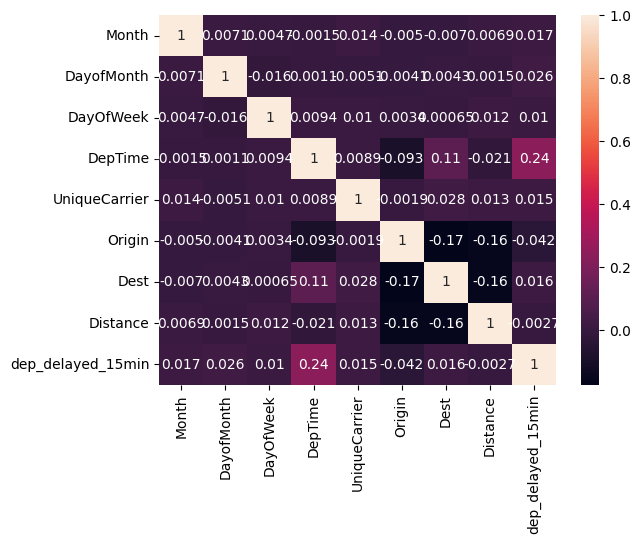

In [4]:
corr = data_set.corr()
print(corr)
sns.heatmap(corr, annot=True)
plt.show()

## Pairplot

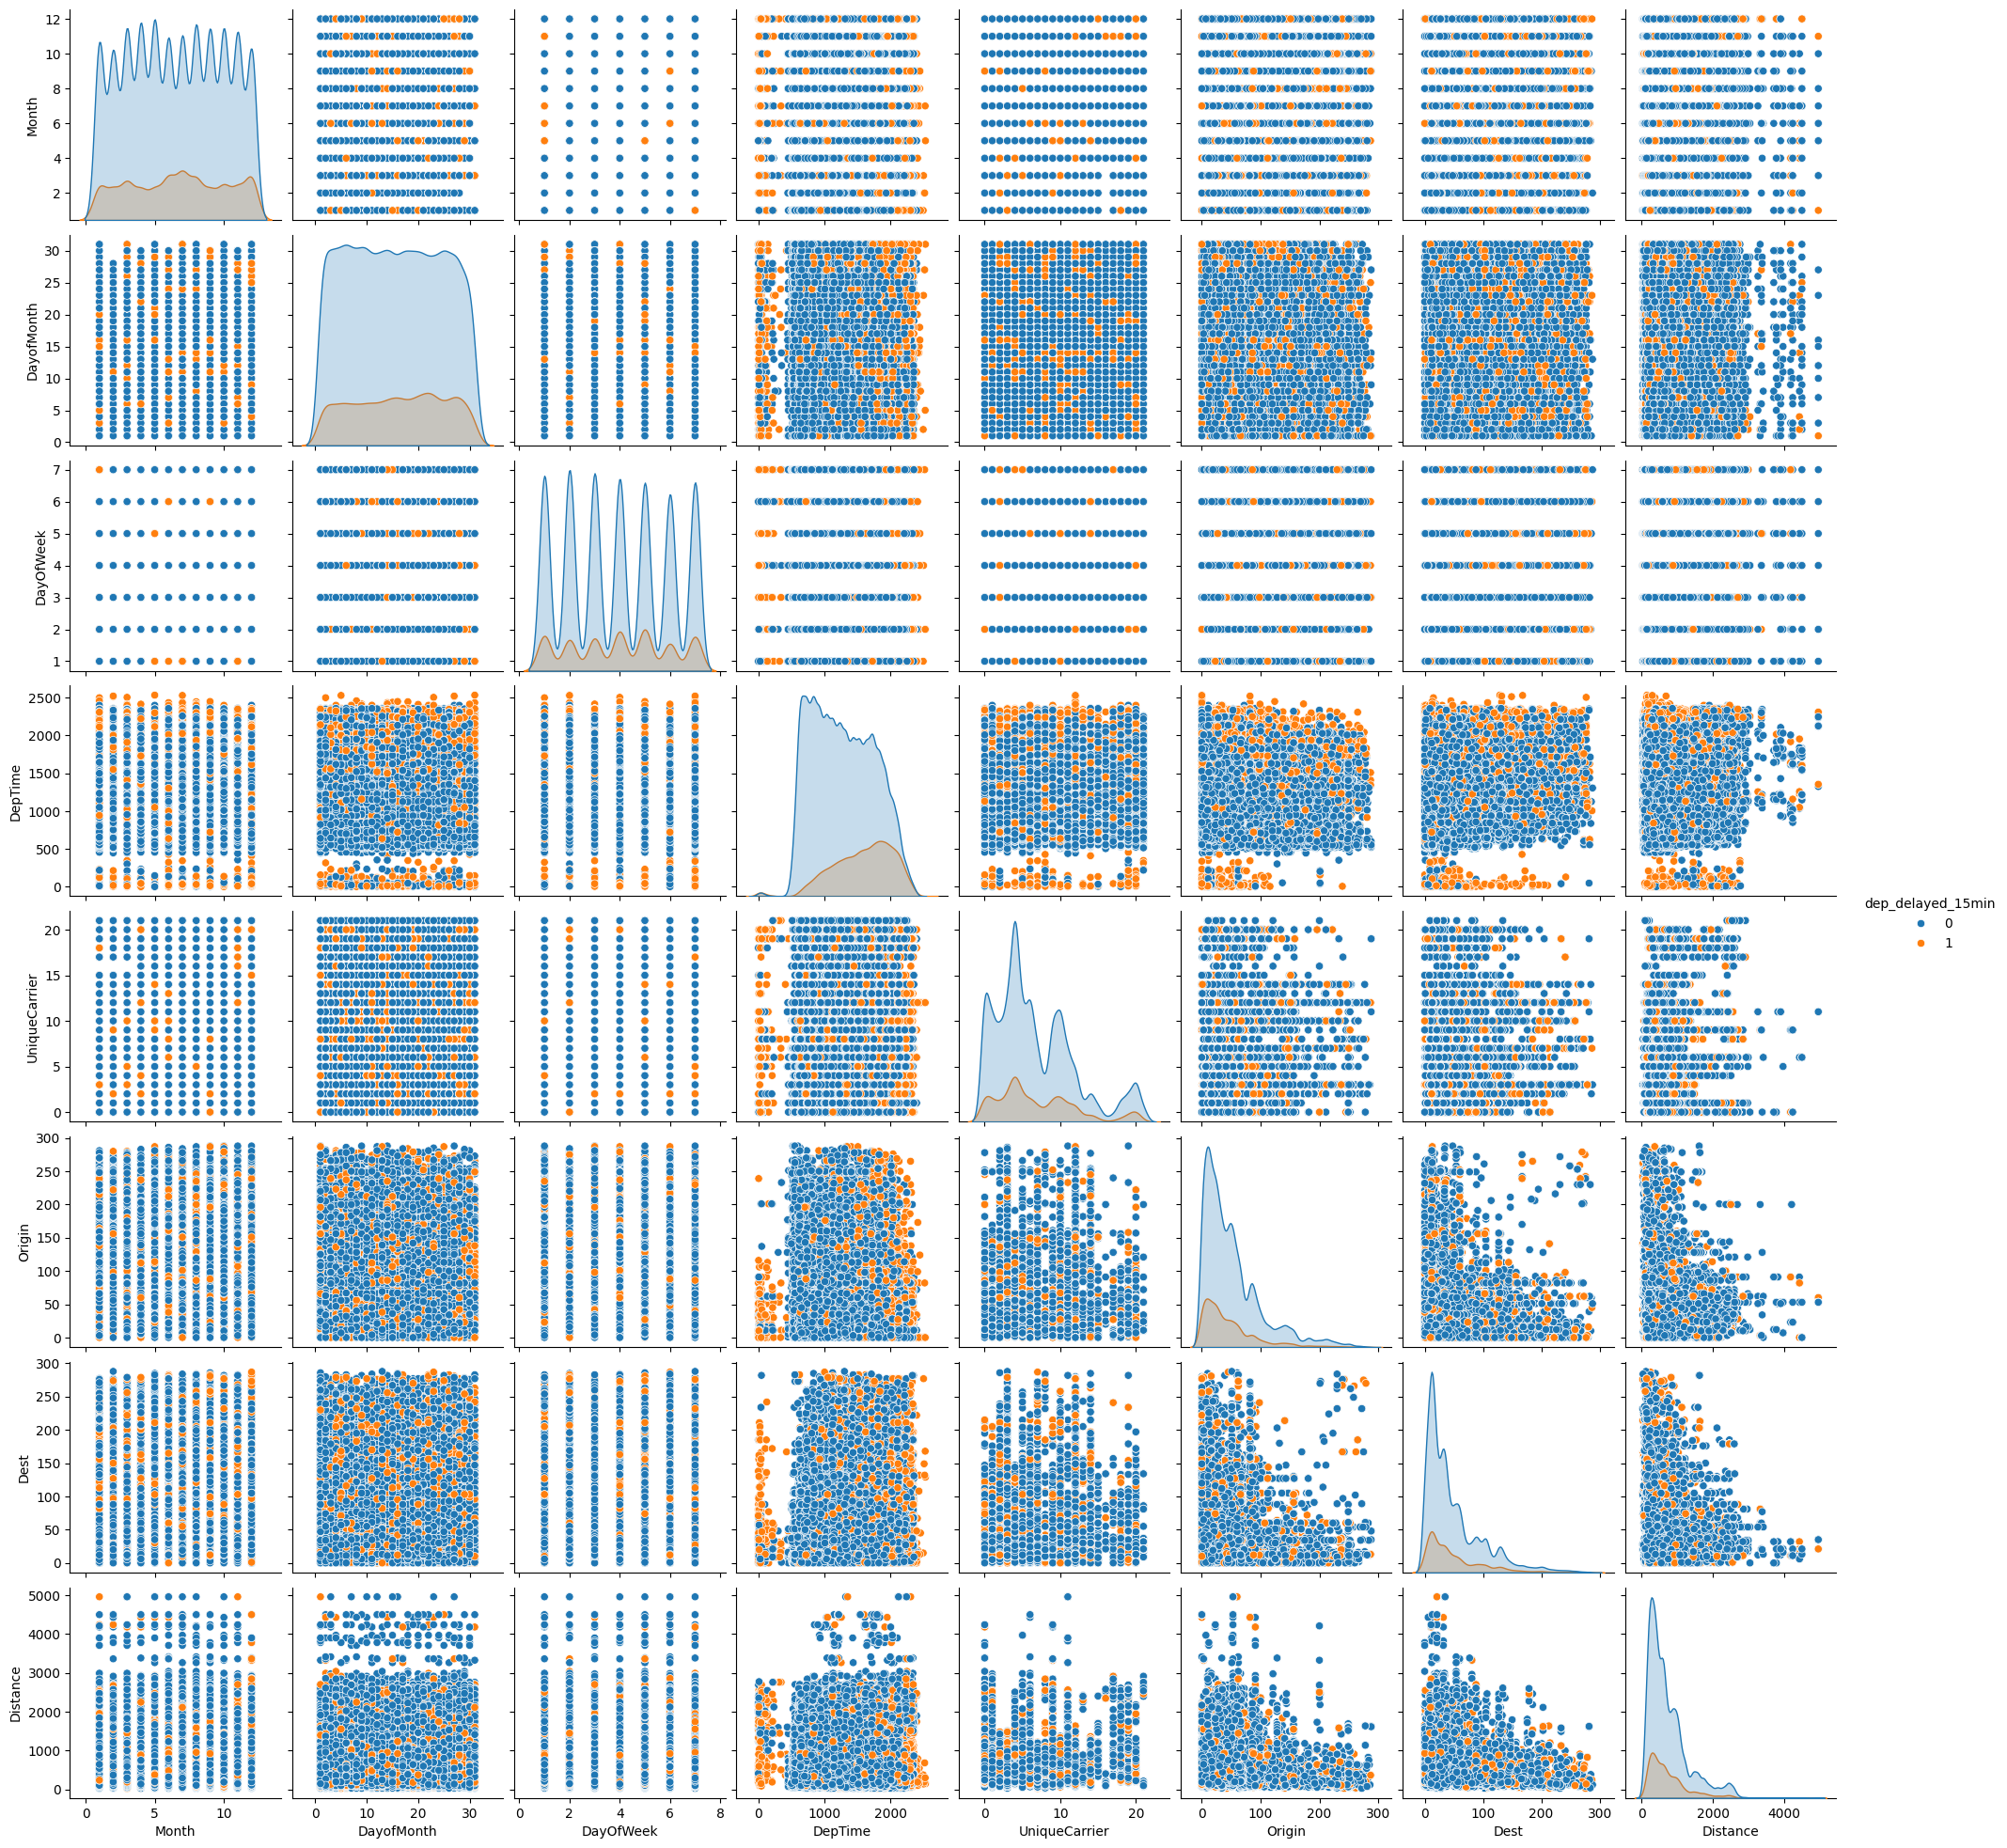

In [5]:
sns.pairplot(data_set, hue='dep_delayed_15min')
plt.show()

By having a quick look on the pairplot of the dataset, we can see that DepTime feature is a nice feature for predicting. Other than that, some combinations of the features might also work for predictions. We will try using all features and then only the DepTime feature and compare the results.

# Training Models

Before training, we need to separate the labels from features and also split the data to train and test sets. Selecting 80/20 ratio for splitting.

In [18]:
y = data_set['dep_delayed_15min']
x = data_set.drop('dep_delayed_15min', axis=1)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, shuffle=True)

Import necessary libraries:

In [19]:
from dt import fit_decision_tree

## Decision Tree Classifiers

In [26]:
dt_list = []
for i in range(1, 9):
    depth = i*8
    print("\nDecision Tree with max depth: ", depth)
    dt = fit_decision_tree(x_train, y_train, depth)
    dt_list.append([dt, depth])


Decision Tree with max depth:  8

Decision Tree with max depth:  16

Decision Tree with max depth:  24

Decision Tree with max depth:  32

Decision Tree with max depth:  40

Decision Tree with max depth:  48

Decision Tree with max depth:  56

Decision Tree with max depth:  64


# Metrics

Import necessary libraries:

In [ ]:
from sklearn.metrics import classification_report

## Decision Tree Classifiers

### Test Set Metrics

In [27]:
for tuple in dt_list:
    dt = tuple[0]
    max_depth = tuple[1]

    print("\nDecision Tree with max depth: ", max_depth)
    y_pred = dt.predict(x_test)
    print(classification_report(y_test, y_pred))


Decision Tree with max depth:  8
              precision    recall  f1-score   support

           0       0.82      0.99      0.90     16222
           1       0.60      0.09      0.15      3778

    accuracy                           0.82     20000
   macro avg       0.71      0.54      0.53     20000
weighted avg       0.78      0.82      0.76     20000


Decision Tree with max depth:  16
              precision    recall  f1-score   support

           0       0.83      0.91      0.87     16222
           1       0.36      0.22      0.28      3778

    accuracy                           0.78     20000
   macro avg       0.60      0.57      0.57     20000
weighted avg       0.74      0.78      0.76     20000


Decision Tree with max depth:  24
              precision    recall  f1-score   support

           0       0.84      0.83      0.84     16222
           1       0.30      0.31      0.31      3778

    accuracy                           0.73     20000
   macro avg       0.57 

### Train Set Metrics

In [28]:
for tuple in dt_list:
    dt = tuple[0]
    max_depth = tuple[1]

    print("\nDecision Tree with max depth: ", max_depth)
    y_pred = dt.predict(x_train)
    print(classification_report(y_train, y_pred))


Decision Tree with max depth:  8
              precision    recall  f1-score   support

           0       0.82      0.99      0.90     64734
           1       0.65      0.10      0.18     15266

    accuracy                           0.82     80000
   macro avg       0.74      0.55      0.54     80000
weighted avg       0.79      0.82      0.76     80000


Decision Tree with max depth:  16
              precision    recall  f1-score   support

           0       0.89      0.98      0.94     64734
           1       0.87      0.51      0.64     15266

    accuracy                           0.89     80000
   macro avg       0.88      0.74      0.79     80000
weighted avg       0.89      0.89      0.88     80000


Decision Tree with max depth:  24
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     64734
           1       0.99      0.93      0.96     15266

    accuracy                           0.98     80000
   macro avg       0.98 

# Model Comparisons